In [61]:
video_path = os.getenv('HOME')+'/aiffel/video_sticker_app'
video_path

'/home/aiffel0042/aiffel/video_sticker_app'

In [62]:
shape_path = os.path.join(video_path,'models/shape_predictor_68_face_landmarks.dat')
shape_path

'/home/aiffel0042/aiffel/video_sticker_app/models/shape_predictor_68_face_landmarks.dat'

In [63]:
detector_hog = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor(shape_path)
landmark_predictor

In [64]:
dir_path = video_path
video_path = os.path.join(dir_path,'images/video2.mp4')
sticker_path = os.path.join(dir_path,'images/king.png')
image_path

'/home/aiffel0042/aiffel/video_sticker_app/images/video2.mp4/images/video2.mp4/images/test_img.jpg'

In [65]:
vc = cv2.VideoCapture(video_path)
img_sticker = cv2.imread(sticker_path)

In [66]:
vlen = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))
print (vlen) # 비디오 프레임의 총 개수

405


In [67]:
dir_path

'/home/aiffel0042/aiffel/video_sticker_app'

In [91]:
image_path = os.path.join(dir_path,'images/test_img.jpeg')
image_path

'/home/aiffel0042/aiffel/video_sticker_app/images/test_img.jpeg'

In [92]:
from matplotlib import pyplot as plt
test = cv2.imread(image_path,cv2.IMREAD_COLOR)

In [93]:
test.shape

(2048, 1366, 3)

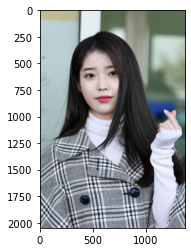

In [94]:
img_rgb = cv2.cvtColor(test,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [95]:
dlib_rects = detector_hog(img_rgb,0)
dlib_rects

rectangles[[(336, 485) (782, 930)]]

In [96]:
cropped_image = img_rgb[485:930, 336:782, :]
print(cropped_image.shape)

(445, 446, 3)


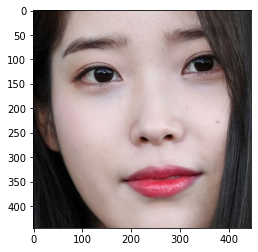

In [97]:
plt.imshow(cropped_image)

In [99]:
len(dlib_rects)

1

In [118]:
# landmark
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y),points.parts()))
    list_landmarks.append(list_points)

In [124]:
for a in dlib_rects:
    print(a.width())

447


In [125]:
# https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/
for dlib_rect , landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0] # nose
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    break
img_sticker = cv2.resize(img_sticker, (w,h), interpolation=cv2.INTER_NEAREST)

In [130]:
img_sticker.shape

(447, 447, 3)

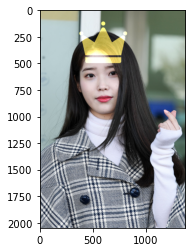

In [134]:
refined_x = x - w // 2
refined_y = y - h
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
img_bgr = test.copy()
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], 
        refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], 
        refined_x:refined_x+img_sticker.shape[1]] = \
        cv2.addWeighted(sticker_area, 1.0, img_sticker, 0.7, 0)

attach_rgb_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(attach_rgb_image)